   The purpose of this project is to use well-known, publicly available macroeconomic indicators to explore how these metrics look before and during recessions, and ultimately, to use them to train a model to predict future recessions. My interest in this topic stem from my own independent hypothesis that the United States is currently nearing the end of a record-setting economic expansion, and is flashing warning signs of an impending recession. 

   How the economy is doing is a central point of conversation for people in every industry and background - economists at the fed, business executives, politicians, banks, real estate developers, and many others have a strongly vested interest in both where the economy is today and which direction it is trending towards. 


   The project will be broken up into two major phases. The first is the Exploratory Data Analysis (EDA) phase, where we will explore the relationships between the various variables and how strong they are in reflecting the current business environment and what the business environments look like 3 months, 6 months, and 12 months before a recession. The second part of the project will feature machine learning to build a model for predict whether the current environment is a recession, and also whether a recession is predicted 3, 6, and 12 months from the current date.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import datetime

In [2]:
#Import financial data

ism = pd.read_csv('ISMPMI.csv', parse_dates=['Date'])
peratio = pd.read_csv('PERatio.csv', parse_dates=['Date'])
treasuryrates = pd.read_csv('TreasuryRates.csv', parse_dates=['Date'])
recession = pd.read_csv('USREC.csv', parse_dates=['Date', 'Start', 'End'])
vix = pd.read_csv('VixData.csv', parse_dates=['Date'])

In [3]:
#Subtract 3 months, 6 months, and 1 year from date column in recession to prep it to test forecasting ability of financial metrics
rec_3 = recession.copy()
rec_3.Date = rec_3.Date.apply(lambda x: x - pd.DateOffset(months=3))

rec_6 = recession.copy()
rec_6.Date = rec_6.Date.apply(lambda x: x - pd.DateOffset(months=6))

rec_12 = recession.copy()
rec_12.Date = rec_12.Date.apply(lambda x: x - pd.DateOffset(months=12))


In [4]:
ism_recession = ism.merge(recession, how = 'outer', on = 'Date')
ism_rec_3 = ism.merge(rec_3, how = 'outer', on = 'Date')
ism_rec_6 = ism.merge(rec_6, how = 'outer', on = 'Date')
ism_rec_12 = ism.merge(rec_12, how = 'outer', on = 'Date')
print(ism_recession.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 5 columns):
Date     1420 non-null datetime64[ns]
PMI      843 non-null float64
USREC    1420 non-null int64
Start    333 non-null datetime64[ns]
End      333 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1)
memory usage: 66.6 KB
None


The Institute of Supply Management’s Purchasing Managers Index is a monthly survey to purchasing executives in at approximately 300 companies in the manufacturing sector, and it’s reading is calculated as such:

PMI = (P1* 1) + (P2 * 0.5) + (P3 * 0)

where P1 represents the percentage of respondents reporting an improvement, P2 represents the percentage of respondents reporting no improvement, and P3 represents the percentage of respondents reporting a deterioration. As the manufacturing sector is often a bellwether of the economy, the PMI is seen as a strong reflection of economic conditions. A reading of 50 indicates a completely neutral reading, while a reading of above 50 typically signals an expansionary environment.

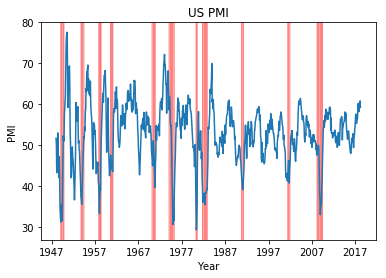

In [5]:
###Plotting linegraph for ISM data to show relationship between that and periods of recession


#Shade in recessions in linegraph
x = ism_recession.Date
y = ism_recession.PMI

plt.plot(x, y)
plt.title('US PMI')
plt.xlabel('Year')
plt.ylabel('PMI')

ism_recession_NaT = ism_recession[~np.isnat(ism_recession.Start)]
ism_recession_NaT = ism_recession_NaT[ism_recession_NaT.Date > datetime.date(1946, 1, 1)]

for index, row in ism_recession_NaT.iterrows():
    plt.axvspan(row['Start'], row['End'], color='r', alpha=0.2)

    

US PMI Mean During Recessions: 42.594262295081954
US PMI Standard Deviation During Recessions: 6.966610051045805


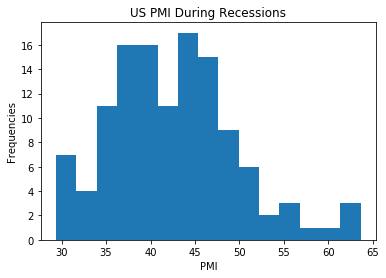

In [6]:
#Histograms of ISM Data during recessions and not during recessions

ism_hist_recession = ism_recession[ism_recession.USREC == 1]
ism_hist_not_recession = ism_recession[ism_recession.USREC == 0]

ism_hist_rec_3 = ism_rec_3[ism_rec_3.USREC == 1]
ism_hist_rec_6 = ism_rec_6[ism_rec_6.USREC == 1]
ism_hist_rec_12 = ism_rec_12[ism_rec_12.USREC == 1]

#Get Integer values for PMI to make histograms, take out NaN values

ism_hist_recession = ism_hist_recession[~np.isnan(ism_hist_recession.PMI)]
ism_hist_not_recession = ism_hist_not_recession[~np.isnan(ism_hist_not_recession.PMI)]

ism_hist_rec_3 = ism_hist_rec_3[~np.isnan(ism_hist_rec_3.PMI)]
ism_hist_rec_6 = ism_hist_rec_6[~np.isnan(ism_hist_rec_6.PMI)]
ism_hist_rec_12 = ism_hist_rec_12[~np.isnan(ism_hist_rec_12.PMI)]

for i in ism_hist_recession.PMI:
    int(i)

for i in ism_hist_not_recession.PMI:
    int(i)


for i in ism_hist_rec_3.PMI:
    int(i)

for i in ism_hist_rec_6.PMI:
    int(i)
    
for i in ism_hist_rec_12.PMI:
    int(i)


plt.hist(ism_hist_recession.PMI, bins = 15)
plt.title('US PMI During Recessions')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean During Recessions: ' + str(np.mean(ism_hist_recession.PMI)))
print('US PMI Standard Deviation During Recessions: ' + str(np.std(ism_hist_recession.PMI)))

US PMI Mean During Non-Recessionary Periods: 54.58238557558941
US PMI Standard Deviation During Non-Recessionary Periods: 5.837119525128642


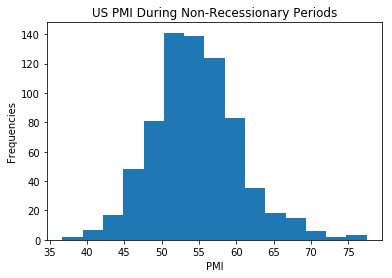

In [7]:
#Histogram for US PMI During Non-Recessionary Periods

plt.hist(ism_hist_not_recession.PMI, bins = 15)
plt.title('US PMI During Non-Recessionary Periods')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean During Non-Recessionary Periods: ' + str(np.mean(ism_hist_not_recession.PMI)))
print('US PMI Standard Deviation During Non-Recessionary Periods: ' + str(np.std(ism_hist_not_recession.PMI)))

US PMI Mean 3 Months before Recession: 44.85245901639342
US PMI Standard Deviation 3 Months Before Recession: 7.5412441152436775


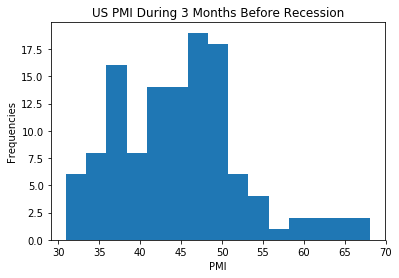

In [8]:
#Histogram for US PMI 3 Months leading up to Recession

plt.hist(ism_hist_rec_3.PMI, bins = 15)
plt.title('US PMI During 3 Months Before Recession')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean 3 Months before Recession: ' + str(np.mean(ism_hist_rec_3.PMI)))
print('US PMI Standard Deviation 3 Months Before Recession: ' + str(np.std(ism_hist_rec_3.PMI)))

US PMI Mean 6 Months before Recession: 47.83852459016392
US PMI Standard Deviation 6 Months Before Recession: 7.335691399927417


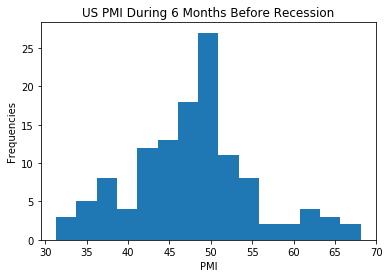

In [9]:
#Histogram for US PMI 6 Months leading up to Recession

plt.hist(ism_hist_rec_6.PMI, bins = 15)
plt.title('US PMI During 6 Months Before Recession')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean 6 Months before Recession: ' + str(np.mean(ism_hist_rec_6.PMI)))
print('US PMI Standard Deviation 6 Months Before Recession: ' + str(np.std(ism_hist_rec_6.PMI)))

US PMI Mean 12 Months before Recession: 53.407438016528914
US PMI Standard Deviation 12 Months Before Recession: 6.645437946618446


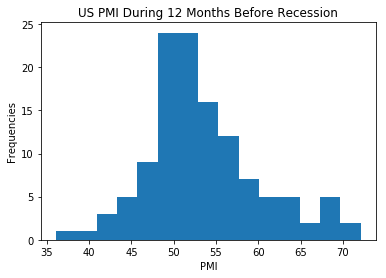

In [10]:
#Histogram for US PMI 12 Months leading up to Recession

plt.hist(ism_hist_rec_12.PMI, bins = 15)
plt.title('US PMI During 12 Months Before Recession')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean 12 Months before Recession: ' + str(np.mean(ism_hist_rec_12.PMI)))
print('US PMI Standard Deviation 12 Months Before Recession: ' + str(np.std(ism_hist_rec_12.PMI)))

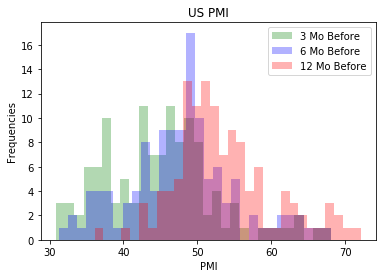

In [11]:
# Overlaid Histograms - PMI

plt.hist(ism_hist_rec_3.PMI, bins = 30, alpha = 0.3, color = 'green')
plt.hist(ism_hist_rec_6.PMI, bins = 30, alpha = 0.3, color = 'blue')
plt.hist(ism_hist_rec_12.PMI, bins = 30, alpha = 0.3, color = 'red')

plt.title('US PMI')
plt.xlabel('PMI')
plt.ylabel('Frequencies')
plt.legend(['3 Mo Before', '6 Mo Before', '12 Mo Before'], loc='upper right')
plt.show()

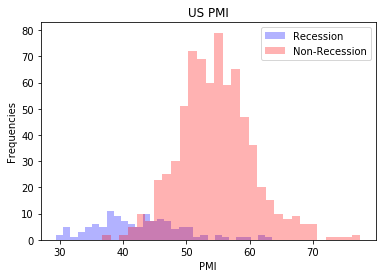

In [12]:
#Overlaid Histograms - recession/not recession


plt.hist(ism_hist_recession.PMI, bins = 30, alpha = 0.3, color = 'blue')
plt.hist(ism_hist_not_recession.PMI, bins = 30, alpha = 0.3, color = 'red')

plt.title('US PMI')
plt.xlabel('PMI')
plt.ylabel('Frequencies')
plt.legend(['Recession', 'Non-Recession'], loc='upper right')
plt.show()

The S&P P/E ratio is a measure of the S&P’s price per share divided by its earnings per share (EPS). Markets typically hit a peak before a recession, because excessive exuberance usually gives way to doubt and pessimism. The P/E ratio is a numeric value that shows how expensive or cheap the market is relative to its earnings. During expansionary periods, this ratio typically climbs because earnings will expand, and this positive momentum creates a feedback cycle where investors are willing to a larger premium for returns in the market.

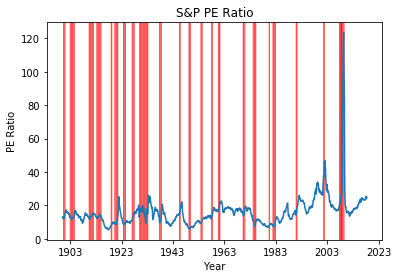

In [13]:
###Plotting linegraph for PE data

#Join PE data and US Recession data

pe_recession = peratio.merge(recession, how = 'outer', on = 'Date')
pe_rec_3 = peratio.merge(rec_3, how = 'outer', on = 'Date')
pe_rec_6 = peratio.merge(rec_6, how = 'outer', on = 'Date')
pe_rec_12 = peratio.merge(rec_12, how = 'outer', on = 'Date')


x_pe = pe_recession.Date
y_pe = pe_recession.PE

plt.plot(x_pe, y_pe)
plt.title('S&P PE Ratio')
plt.xlabel('Year')
plt.ylabel('PE Ratio')

#Shade in recessions in linegraph

pe_recession_NaT = pe_recession[~np.isnat(pe_recession.Start)]
pe_recession_NaT = pe_recession_NaT[pe_recession_NaT.Date > datetime.date(1900, 1, 1)]

for index, row in pe_recession_NaT.iterrows():
    plt.axvspan(row['Start'], row['End'], color='r', alpha=0.2)

Average S&P PE Ratio During Recessions: 15.10312312312312
S&P PE Ratio Standard Deviation During Recessions: 13.852808428517779


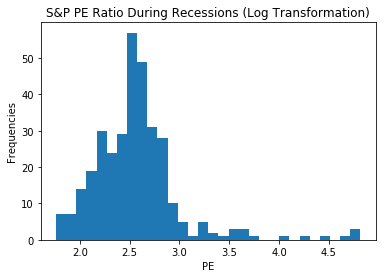

In [14]:
#Histograms of PE Data during recessions and not during recessions

pe_hist_recession = pe_recession[pe_recession.USREC == 1]
pe_hist_not_recession = pe_recession[pe_recession.USREC == 0]

pe_hist_rec_3 = pe_rec_3[pe_rec_3.USREC == 1]
pe_hist_rec_6 = pe_rec_6[pe_rec_6.USREC == 1]
pe_hist_rec_12 = pe_rec_12[pe_rec_12.USREC == 1]

#Get Integer values for PE to make histograms, take out NaN values

pe_hist_recession = pe_hist_recession[~np.isnan(pe_hist_recession.PE)]
pe_hist_not_recession = pe_hist_not_recession[~np.isnan(pe_hist_not_recession.PE)]

pe_hist_rec_3 = pe_hist_rec_3[~np.isnan(pe_hist_rec_3.PE)]
pe_hist_rec_6 = pe_hist_rec_6[~np.isnan(pe_hist_rec_6.PE)]
pe_hist_rec_12 = pe_hist_rec_12[~np.isnan(pe_hist_rec_12.PE)]

for i in pe_hist_recession.PE:
    int(i)

for i in pe_hist_not_recession.PE:
    int(i)


for i in pe_hist_rec_3.PE:
    int(i)

for i in pe_hist_rec_6.PE:
    int(i)
    
for i in pe_hist_rec_12.PE:
    int(i)


plt.hist(np.log(pe_hist_recession.PE), bins = 30)
plt.title('S&P PE Ratio During Recessions (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio During Recessions: ' + str(np.mean(pe_hist_recession.PE)))
print('S&P PE Ratio Standard Deviation During Recessions: ' + str(np.std(pe_hist_recession.PE)))

Average S&P PE Ratio during Non-Recessionary Periods: 16.18758969641218
S&P PE Ratio Standard Deviation during Non-Recessionary Periods: 7.211078610306184


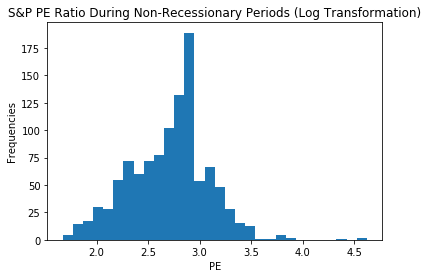

In [15]:
#Histogram of PE Ratios during non-recessionary periods

plt.hist(np.log(pe_hist_not_recession.PE), bins = 30)
plt.title('S&P PE Ratio During Non-Recessionary Periods (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio during Non-Recessionary Periods: ' + str(np.mean(pe_hist_not_recession.PE)))
print('S&P PE Ratio Standard Deviation during Non-Recessionary Periods: ' + str(np.std(pe_hist_not_recession.PE)))

Average S&P PE Ratio 3 Months before Recession: 14.065969696969704
S&P PE Ratio Standard Deviation 3 Months before Recession: 9.172272270552286


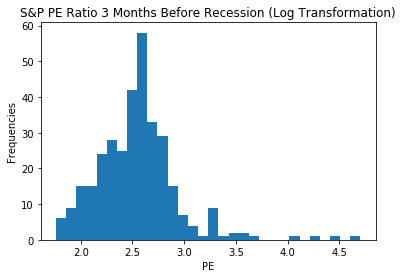

In [16]:
#Histogram of PE Ratios 3 months before recession

plt.hist(np.log(pe_hist_rec_3.PE), bins = 30)
plt.title('S&P PE Ratio 3 Months Before Recession (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio 3 Months before Recession: ' + str(np.mean(pe_hist_rec_3.PE)))
print('S&P PE Ratio Standard Deviation 3 Months before Recession: ' + str(np.std(pe_hist_rec_3.PE)))

Average S&P PE Ratio 6 Months before Recession: 13.586483180428143
S&P PE Ratio Standard Deviation 6 Months before Recession: 5.28079674267858


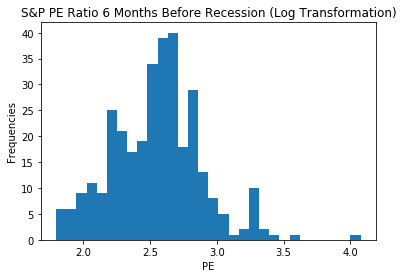

In [17]:
#Histogram of PE Ratios 6 months before recession

plt.hist(np.log(pe_hist_rec_6.PE), bins = 30)
plt.title('S&P PE Ratio 6 Months Before Recession (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio 6 Months before Recession: ' + str(np.mean(pe_hist_rec_6.PE)))
print('S&P PE Ratio Standard Deviation 6 Months before Recession: ' + str(np.std(pe_hist_rec_6.PE)))

Average S&P PE Ratio 12 Months before Recession: 13.945482866043609
S&P PE Ratio Standard Deviation 12 Months before Recession: 4.216936978082644


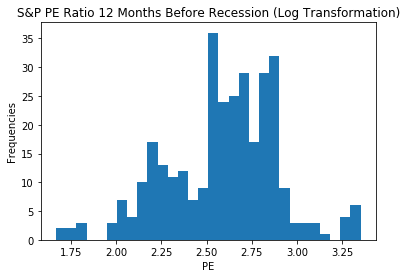

In [18]:
#Histogram of PE Ratios 12 months before recession

plt.hist(np.log(pe_hist_rec_12.PE), bins = 30)
plt.title('S&P PE Ratio 12 Months Before Recession (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio 12 Months before Recession: ' + str(np.mean(pe_hist_rec_12.PE)))
print('S&P PE Ratio Standard Deviation 12 Months before Recession: ' + str(np.std(pe_hist_rec_12.PE)))

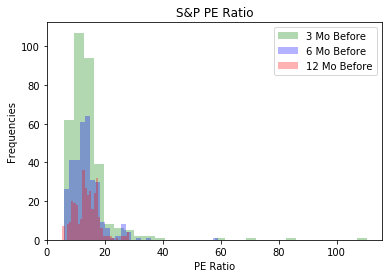

In [19]:
# Overlaid Histograms - PE Ratio

plt.hist(pe_hist_rec_3.PE, bins = 30, alpha = 0.3, color = 'green')
plt.hist(pe_hist_rec_6.PE, bins = 30, alpha = 0.3, color = 'blue')
plt.hist(pe_hist_rec_12.PE, bins = 30, alpha = 0.3, color = 'red')

plt.title('S&P PE Ratio')
plt.xlabel('PE Ratio')
plt.ylabel('Frequencies')
plt.legend(['3 Mo Before', '6 Mo Before', '12 Mo Before'], loc='upper right')
plt.show()

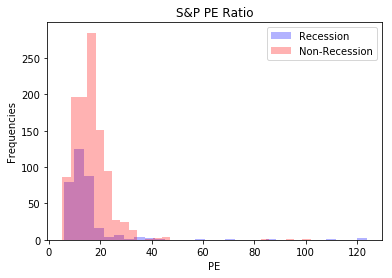

In [20]:
#Overlaid Histograms - recession/not recession


plt.hist(pe_hist_recession.PE, bins = 30, alpha = 0.3, color = 'blue')
plt.hist(pe_hist_not_recession.PE, bins = 30, alpha = 0.3, color = 'red')

plt.title('S&P PE Ratio')
plt.xlabel('PE')
plt.ylabel('Frequencies')
plt.legend(['Recession', 'Non-Recession'], loc='upper right')
plt.show()

In [21]:
### Because Treasury and Vix Data have daily entries, we need to interpolate the recession csv file, since it is monthly

series = pd.read_csv('USREC.csv', parse_dates=['Date', 'Start', 'End'], index_col = ['Date'])
recession_resampled = series.resample('D')
recession_interpolated = recession_resampled.interpolate(method = 'linear')


def makezero(i):
    if i == 1:
        return 1
    else:
        return 0


recession_interpolated.USREC = recession_interpolated.USREC.apply(makezero)

recession_interpolated = recession_interpolated.reset_index()

recession.info()
recession_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 4 columns):
Date     1420 non-null datetime64[ns]
USREC    1420 non-null int64
Start    333 non-null datetime64[ns]
End      333 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 44.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43190 entries, 0 to 43189
Data columns (total 4 columns):
Date     43190 non-null datetime64[ns]
USREC    43190 non-null int64
Start    333 non-null datetime64[ns]
End      333 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 1.3 MB


In [22]:
rec_3_interpolated = recession_interpolated.copy()
rec_3_interpolated.Date = rec_3_interpolated.Date.apply(lambda x: x - pd.DateOffset(months=3))

rec_6_interpolated = recession_interpolated.copy()
rec_6_interpolated.Date = rec_6_interpolated.Date.apply(lambda x: x - pd.DateOffset(months=6))

rec_12_interpolated = recession_interpolated.copy()
rec_12_interpolated.Date = rec_12_interpolated.Date.apply(lambda x: x - pd.DateOffset(months=12))

The US Treasury spread represents the difference in the 10-year yield of a US Treasury and the 3-month yield of a treasury. The Federal Reserve utilizes this spread as a proxy for market sentiment, as the slope of the yield curve give clues to the prevailing market expectations. In times of extreme fear, institutions in financial markets know that interest rates will trend lower because of central bank intervention, so investor move funds from short-term bonds to longer-term bonds. An inverted yield curve often is an accurate signal for an impending recession, so the Federal Reserve keeps close tabs on this spread to gauge market expectations. 

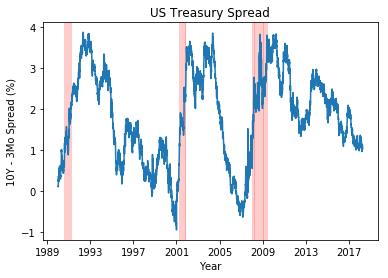

In [23]:
####Plotting linegraph for US Treasury Spread (10 year - 3 month) 

#Join Treasury data and US Recession data
treasuryrates = treasuryrates[['Date', '3_Mo', '10_Yr']]
treasuryrates = treasuryrates.dropna()
treasuryrates['spread'] = treasuryrates['10_Yr'] - treasuryrates['3_Mo']

tr_recession = treasuryrates.merge(recession, how = 'outer', on = 'Date')

tr_recession_interpolated = treasuryrates.merge(recession_interpolated, how = 'outer', on = 'Date')
tr_rec_3_interpolated = treasuryrates.merge(rec_3_interpolated, how = 'outer', on = 'Date')
tr_rec_6_interpolated = treasuryrates.merge(rec_6_interpolated, how = 'outer', on = 'Date')
tr_rec_12_interpolated = treasuryrates.merge(rec_12_interpolated, how = 'outer', on = 'Date')


x_tr = tr_recession.Date
y_tr = tr_recession.spread

plt.plot(x_tr, y_tr)
plt.title('US Treasury Spread')
plt.xlabel('Year')
plt.ylabel('10Y - 3Mo Spread (%)')

#Shade in recessions in linegraph

tr_recession_NaT = tr_recession[~np.isnat(tr_recession.Start)]
tr_recession_NaT = tr_recession_NaT[tr_recession_NaT.Date > datetime.date(1990, 1, 1)]

for index, row in tr_recession_NaT.iterrows():
    plt.axvspan(row['Start'], row['End'], color='r', alpha=0.2)

Average US Treasury Spreads During Recessions: 2.003654743390357
US Treasury Spreads Standard Deviation During Recessions: 0.6744528470180484


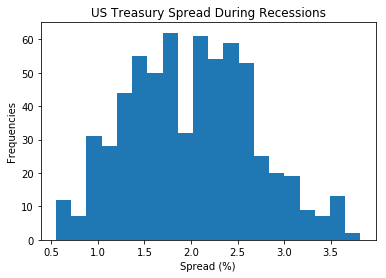

In [24]:
#Histograms of Treasury Spread data during recessions and not during recessions

tr_hist_recession_interpolated = tr_recession_interpolated[tr_recession_interpolated.USREC == 1]
tr_hist_not_recession_interpolated = tr_recession_interpolated[tr_recession_interpolated.USREC == 0]

tr_hist_rec_3_interpolated = tr_rec_3_interpolated[tr_rec_3_interpolated.USREC == 1]
tr_hist_rec_6_interpolated = tr_rec_6_interpolated[tr_rec_6_interpolated.USREC == 1]
tr_hist_rec_12_interpolated = tr_rec_12_interpolated[tr_rec_12_interpolated.USREC == 1]

#Get Integer values for spread to make histograms, take out NaN values

tr_hist_recession_interpolated = tr_hist_recession_interpolated[~np.isnan(tr_hist_recession_interpolated.spread)]
tr_hist_not_recession_interpolated = tr_hist_not_recession_interpolated[~np.isnan(tr_hist_not_recession_interpolated.spread)]

tr_hist_rec_3_interpolated = tr_hist_rec_3_interpolated[~np.isnan(tr_hist_rec_3_interpolated.spread)]
tr_hist_rec_6_interpolated = tr_hist_rec_6_interpolated[~np.isnan(tr_hist_rec_6_interpolated.spread)]
tr_hist_rec_12_interpolated = tr_hist_rec_12_interpolated[~np.isnan(tr_hist_rec_12_interpolated.spread)]


plt.hist(tr_hist_recession_interpolated.spread, bins = 20)
plt.title('US Treasury Spread During Recessions')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads During Recessions: ' + str(np.mean(tr_hist_recession_interpolated.spread)))
print('US Treasury Spreads Standard Deviation During Recessions: ' + str(np.std(tr_hist_recession_interpolated.spread)))

Average US Treasury Spreads, Non-Recessionary Periods: 1.796080049836476
US Treasury Spreads Standard, Non-Recessionary Periods: 1.1472973079077389


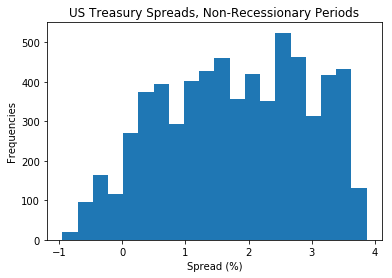

In [25]:
#Histogram of Spreads during non-recessionary periods

plt.hist(tr_hist_not_recession_interpolated.spread, bins = 20)
plt.title('US Treasury Spreads, Non-Recessionary Periods')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads, Non-Recessionary Periods: ' + str(np.mean(tr_hist_not_recession_interpolated.spread)))
print('US Treasury Spreads Standard, Non-Recessionary Periods: ' + str(np.std(tr_hist_not_recession_interpolated.spread)))

Average US Treasury Spreads 3 Months Before Recession: 1.5319844961240303
US Treasury Spreads Standard Deviation 3 Months Before Recession: 0.9004428366560598


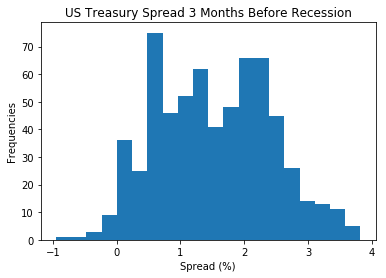

In [26]:
#Histogram of Spreads 3 months before recession

plt.hist(tr_hist_rec_3_interpolated.spread, bins = 20)
plt.title('US Treasury Spread 3 Months Before Recession')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads 3 Months Before Recession: ' + str(np.mean(tr_hist_rec_3_interpolated.spread)))
print('US Treasury Spreads Standard Deviation 3 Months Before Recession: ' + str(np.std(tr_hist_rec_3_interpolated.spread)))

Average US Treasury Spreads 6 Months Before Recession: 1.040353302611366
US Treasury Spreads Standard Deviation 6 Months Before Recession: 1.0822253476675976


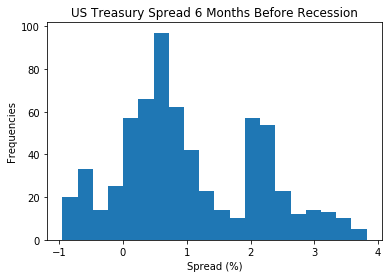

In [27]:
#Histogram of Spreads 6 months before recession

plt.hist(tr_hist_rec_6_interpolated.spread, bins = 20)
plt.title('US Treasury Spread 6 Months Before Recession')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads 6 Months Before Recession: ' + str(np.mean(tr_hist_rec_6_interpolated.spread)))
print('US Treasury Spreads Standard Deviation 6 Months Before Recession: ' + str(np.std(tr_hist_rec_6_interpolated.spread)))

Average US Treasury Spreads 12 Months Before Recession: 0.4229595588235292
US Treasury Spreads Standard Deviation 12 Months Before Recession: 0.8488332553707669


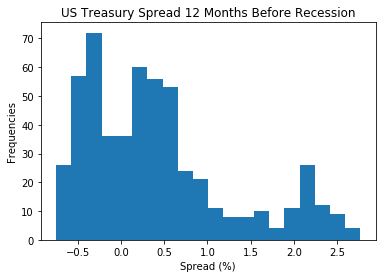

In [28]:
#Histogram of Spreads 12 months before recession

plt.hist(tr_hist_rec_12_interpolated.spread, bins = 20)
plt.title('US Treasury Spread 12 Months Before Recession')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads 12 Months Before Recession: ' + str(np.mean(tr_hist_rec_12_interpolated.spread)))
print('US Treasury Spreads Standard Deviation 12 Months Before Recession: ' + str(np.std(tr_hist_rec_12_interpolated.spread)))

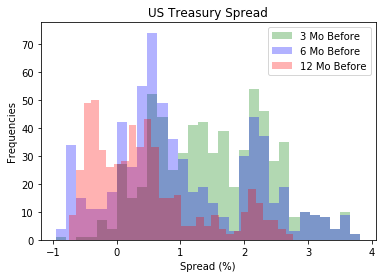

In [29]:
# Overlaid Histograms - Spread Ratio


plt.hist(tr_hist_rec_3_interpolated.spread, bins = 30, alpha = 0.3, color = 'green')
plt.hist(tr_hist_rec_6_interpolated.spread, bins = 30, alpha = 0.3, color = 'blue')
plt.hist(tr_hist_rec_12_interpolated.spread, bins = 30, alpha = 0.3, color = 'red')

plt.title('US Treasury Spread')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')
plt.legend(['3 Mo Before', '6 Mo Before', '12 Mo Before'], loc='upper right')
plt.show()

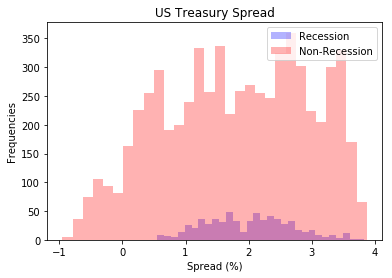

In [30]:
#Overlaid Histograms - recession/not recession


plt.hist(tr_hist_recession_interpolated.spread, bins = 30, alpha = 0.3, color = 'blue')
plt.hist(tr_hist_not_recession_interpolated.spread, bins = 30, alpha = 0.3, color = 'red')

plt.title('US Treasury Spread')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')
plt.legend(['Recession', 'Non-Recession'], loc='upper right')
plt.show()

The VIX is a measure of the stock market’s expectation of volatility implied by the S&P 500’s index options, and is published by the Chicago Board Options Exchange. It is usually referred to as the “fear gauge” or “fear index” because in times of uncertainty, options traders demand higher premiums for underwriting options contracts. The VIX, which is a number, represents the expected annual change in percentage points (ie a VIX value of 20 represents an expected stock market change 20% up or down). The vast majority of days will see a VIX with a value below 15, while a value above 30 often denotes turbulence in the stock market.

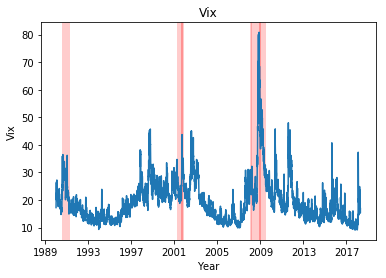

In [32]:
###Plotting linegraph for Vix data

#Join Vix data and US Recession data    
    
vix_recession = vix.merge(recession, how = 'outer', on = 'Date')

vix_recession_interpolated = vix.merge(recession_interpolated, how = 'outer', on = 'Date')
vix_rec_3_interpolated = vix.merge(rec_3_interpolated, how = 'outer', on = 'Date')
vix_rec_6_interpolated = vix.merge(rec_6_interpolated, how = 'outer', on = 'Date')
vix_rec_12_interpolated = vix.merge(rec_12_interpolated, how = 'outer', on = 'Date')


x_vix = vix_recession.Date
y_vix = vix_recession.VIX

plt.plot(x_vix, y_vix)
plt.title('Vix')
plt.xlabel('Year')
plt.ylabel('Vix')

#Shade in recessions in linegraph

vix_recession_NaT = vix_recession[~np.isnat(vix_recession.Start)]
vix_recession_NaT = vix_recession_NaT[vix_recession_NaT.Date > datetime.date(1985, 1, 1)]

for index, row in vix_recession_NaT.iterrows():
    plt.axvspan(row['Start'], row['End'], color='r', alpha=0.2)

Average VIX During Recessions: 31.06446841294295
VIX Standard Deviation During Recessions: 12.179197997181477


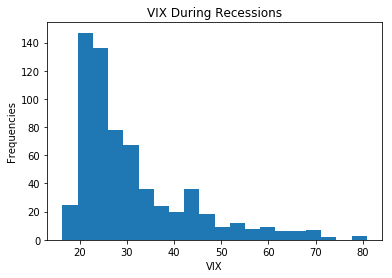

In [33]:
#Histograms of Vix data during recessions and not during recessions

vix_hist_recession_interpolated = vix_recession_interpolated[vix_recession_interpolated.USREC == 1]
vix_hist_not_recession_interpolated = vix_recession_interpolated[vix_recession_interpolated.USREC == 0]

vix_hist_rec_3_interpolated = vix_rec_3_interpolated[vix_rec_3_interpolated.USREC == 1]
vix_hist_rec_6_interpolated = vix_rec_6_interpolated[vix_rec_6_interpolated.USREC == 1]
vix_hist_rec_12_interpolated = vix_rec_12_interpolated[vix_rec_12_interpolated.USREC == 1]

#Get Integer values for spread to make histograms, take out NaN values

vix_hist_recession_interpolated = vix_hist_recession_interpolated[~np.isnan(vix_hist_recession_interpolated.VIX)]
vix_hist_not_recession_interpolated = vix_hist_not_recession_interpolated[~np.isnan(vix_hist_not_recession_interpolated.VIX)]

vix_hist_rec_3_interpolated = vix_hist_rec_3_interpolated[~np.isnan(vix_hist_rec_3_interpolated.VIX)]
vix_hist_rec_6_interpolated = vix_hist_rec_6_interpolated[~np.isnan(vix_hist_rec_6_interpolated.VIX)]
vix_hist_rec_12_interpolated = vix_hist_rec_12_interpolated[~np.isnan(vix_hist_rec_12_interpolated.VIX)]


plt.hist(vix_hist_recession_interpolated.VIX, bins = 20)
plt.title('VIX During Recessions')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX During Recessions: ' + str(np.mean(vix_hist_recession_interpolated.VIX)))
print('VIX Standard Deviation During Recessions: ' + str(np.std(vix_hist_recession_interpolated.VIX)))

Average VIX 3 Months, Non-Recessionary Periods: 18.175115235885567
US Treasury Spreads Standard Deviation, Non-Recessionary Periods: 6.163502433592603


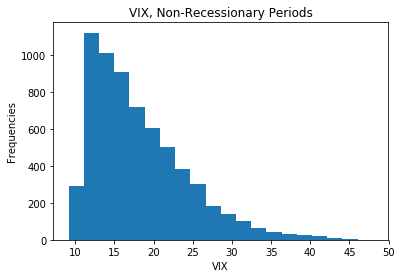

In [34]:
plt.hist(vix_hist_not_recession_interpolated.VIX, bins = 20)
plt.title('VIX, Non-Recessionary Periods')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX 3 Months, Non-Recessionary Periods: ' + str(np.mean(vix_hist_not_recession_interpolated.VIX)))
print('US Treasury Spreads Standard Deviation, Non-Recessionary Periods: ' + str(np.std(vix_hist_not_recession_interpolated.VIX)))

Average VIX 3 Months Before Recession: 28.480015290519866
US Treasury Spreads Standard Deviation 3 Months Before Recession: 12.338122388234137


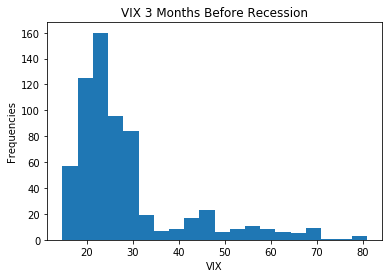

In [35]:
plt.hist(vix_hist_rec_3_interpolated.VIX, bins = 20)
plt.title('VIX 3 Months Before Recession')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX 3 Months Before Recession: ' + str(np.mean(vix_hist_rec_3_interpolated.VIX)))
print('US Treasury Spreads Standard Deviation 3 Months Before Recession: ' + str(np.std(vix_hist_rec_3_interpolated.VIX)))

Average VIX 6 Months Before Recession: 25.818475609756067
US Treasury Spreads Standard Deviation 6 Months Before Recession: 10.677618136957017


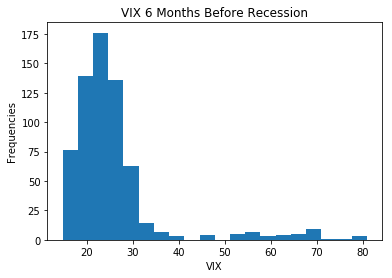

In [36]:
plt.hist(vix_hist_rec_6_interpolated.VIX, bins = 20)
plt.title('VIX 6 Months Before Recession')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX 6 Months Before Recession: ' + str(np.mean(vix_hist_rec_6_interpolated.VIX)))
print('US Treasury Spreads Standard Deviation 6 Months Before Recession: ' + str(np.std(vix_hist_rec_6_interpolated.VIX)))

Average VIX 12 Months Before Recession: 20.469871794871807
US Treasury Spreads Standard Deviation 12 Months Before Recession: 5.253600734689889


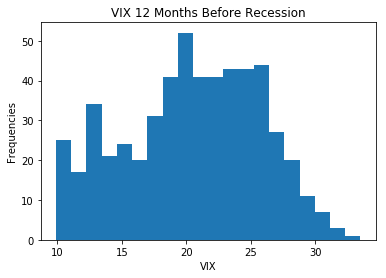

In [37]:
plt.hist(vix_hist_rec_12_interpolated.VIX, bins = 20)
plt.title('VIX 12 Months Before Recession')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX 12 Months Before Recession: ' + str(np.mean(vix_hist_rec_12_interpolated.VIX)))
print('US Treasury Spreads Standard Deviation 12 Months Before Recession: ' + str(np.std(vix_hist_rec_12_interpolated.VIX)))

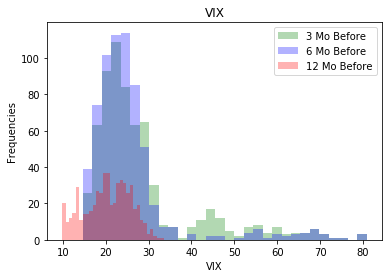

In [38]:
# Overlaid Histograms - Spread Ratio


plt.hist(vix_hist_rec_3_interpolated.VIX, bins = 30, alpha = 0.3, color = 'green')
plt.hist(vix_hist_rec_6_interpolated.VIX, bins = 30, alpha = 0.3, color = 'blue')
plt.hist(vix_hist_rec_12_interpolated.VIX, bins = 30, alpha = 0.3, color = 'red')

plt.title('VIX')
plt.xlabel('VIX')
plt.ylabel('Frequencies')
plt.legend(['3 Mo Before', '6 Mo Before', '12 Mo Before'], loc='upper right')
plt.show()

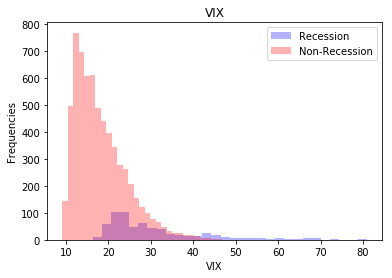

In [39]:
#Overlaid Histograms - recession/not recession


plt.hist(vix_hist_recession_interpolated.VIX, bins = 30, alpha = 0.3, color = 'blue')
plt.hist(vix_hist_not_recession_interpolated.VIX, bins = 30, alpha = 0.3, color = 'red')

plt.title('VIX')
plt.xlabel('VIX')
plt.ylabel('Frequencies')
plt.legend(['Recession', 'Non-Recession'], loc='upper right')
plt.show()

In [40]:
#Find start and end dates of all data

#Found from earlier exploration that Treasury Rates and Vix are daily, while ISM, PE Ratio, and Recession are Monthly. We interpolated Recession to Daily

print('Max Date ISM: ' + str(ism.Date.max()) + ', Min Date ISM: ' + str(ism.Date.min()))
print('Max Date PE Ratio: ' + str(peratio.Date.max()) + ', Min Date PE Ratio: ' + str(peratio.Date.min()))
print('Max Date Treasury Rates: ' + str(treasuryrates.Date.max()) + ', Min Date Treasury Rates: ' + str(treasuryrates.Date.min()))
print('Max Date Recession: ' + str(recession.Date.max()) + ', Min Date Recession: ' + str(recession.Date.min()))
print('Max Date Vix: ' + str(vix.Date.max()) + ', Min Date Vix: ' + str(vix.Date.min()))

Max Date ISM: 2018-03-01 00:00:00, Min Date ISM: 1948-01-01 00:00:00
Max Date PE Ratio: 2018-05-14 00:00:00, Min Date PE Ratio: 1900-01-01 00:00:00
Max Date Treasury Rates: 2018-04-19 00:00:00, Min Date Treasury Rates: 1990-01-02 00:00:00
Max Date Recession: 2018-04-01 00:00:00, Min Date Recession: 1900-01-01 00:00:00
Max Date Vix: 2018-04-20 00:00:00, Min Date Vix: 1990-01-02 00:00:00


In [41]:
# Machine Learning

#ML on ISM and PE datasets

ism_3 = ism.merge(rec_3, how = 'outer', on = 'Date')
ism_6 = ism.merge(rec_6, how = 'outer', on = 'Date')
ism_12 = ism.merge(rec_12, how = 'outer', on = 'Date')

ism_pe_3 = ism_3.merge(peratio, how = 'outer', on = 'Date')
ism_pe_6 = ism_6.merge(peratio, how = 'outer', on = 'Date')
ism_pe_12 = ism_12.merge(peratio, how = 'outer', on = 'Date')

In [42]:
ism_pe_3 = ism_pe_3[['Date', 'PMI', 'USREC', 'PE']]
ism_pe_6 = ism_pe_6[['Date', 'PMI', 'USREC', 'PE']]
ism_pe_12 = ism_pe_12[['Date', 'PMI', 'USREC', 'PE']]

#drop NA values
ism_pe_3 = ism_pe_3.dropna()
ism_pe_6 = ism_pe_6.dropna()
ism_pe_12 = ism_pe_12.dropna()

In [43]:
#Gradient Boosting Classifier Method

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def gbc(data):
    X, Xtest, y, ytest = train_test_split(data[['PMI','PE']], data.USREC.values, random_state=5, test_size = 0.2)
    clf = GradientBoostingClassifier()
    clf.fit(X, y)
    print('Test score (Gradient Boosting): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Gradient Boosting): ' + str(clf.feature_importances_))
    
    
def rfc(data):
    X, Xtest, y, ytest = train_test_split(data[['PMI','PE']], data.USREC.values, random_state=5, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X, y)
    print('Test score (Random Forest): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Random Forest): ' + str(clf.feature_importances_))

In [44]:
#Gradient Boosting/Random Forest for Prediction of recession within 3 months
gbc(ism_pe_3)
rfc(ism_pe_3)

Test score (Gradient Boosting): 0.8520710059171598
Feature Importances (Gradient Boosting): [0.50542701 0.49457299]
Test score (Random Forest): 0.893491124260355
Feature Importances (Random Forest): [0.57384558 0.42615442]


In [45]:
#Gradient Boosting/Random Forest for Prediction of recession within 6 months

gbc(ism_pe_6)
rfc(ism_pe_6)

Test score (Gradient Boosting): 0.8571428571428571
Feature Importances (Gradient Boosting): [0.42126261 0.57873739]
Test score (Random Forest): 0.8452380952380952
Feature Importances (Random Forest): [0.51521664 0.48478336]


In [46]:
#Gradient Boosting/Random Forest for Prediction of recession within 12 months

gbc(ism_pe_12)
rfc(ism_pe_12)

Test score (Gradient Boosting): 0.8562874251497006
Feature Importances (Gradient Boosting): [0.41876305 0.58123695]
Test score (Random Forest): 0.8502994011976048
Feature Importances (Random Forest): [0.46913701 0.53086299]


In [47]:
#ML on VIX and US Treasury Spread datasets

vix_3 = vix.merge(rec_3_interpolated, how = 'outer', on = 'Date')
vix_6 = vix.merge(rec_6_interpolated, how = 'outer', on = 'Date')
vix_12 = vix.merge(rec_12_interpolated, how = 'outer', on = 'Date')

vix_tr_3 = vix_3.merge(treasuryrates, how = 'outer', on = 'Date')
vix_tr_6 = vix_6.merge(treasuryrates, how = 'outer', on = 'Date')
vix_tr_12 = vix_12.merge(treasuryrates, how = 'outer', on = 'Date')

vix_tr_3 = vix_tr_3[['Date', 'VIX', 'USREC', 'spread']]
vix_tr_6 = vix_tr_6[['Date', 'VIX', 'USREC', 'spread']]
vix_tr_12 = vix_tr_12[['Date', 'VIX', 'USREC', 'spread']]

#drop NA values
vix_tr_3 = vix_tr_3.dropna()
vix_tr_6 = vix_tr_6.dropna()
vix_tr_12 = vix_tr_12.dropna()

In [48]:
def gbc2(data):
    X, Xtest, y, ytest = train_test_split(data[['VIX','spread']], data.USREC.values, random_state=5, test_size = 0.2)
    clf = GradientBoostingClassifier()
    clf.fit(X, y)
    print('Test score (Gradient Boosting): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Gradient Boosting): ' + str(clf.feature_importances_))
    
    
def rfc2(data):
    X, Xtest, y, ytest = train_test_split(data[['VIX','spread']], data.USREC.values, random_state=5, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X, y)
    print('Test score (Random Forest): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Random Forest): ' + str(clf.feature_importances_))

In [49]:
#Predict recession 3 months away using VIX/US Treasury Spread

gbc2(vix_tr_3)
rfc2(vix_tr_3)

Test score (Gradient Boosting): 0.9299499642601858
Feature Importances (Gradient Boosting): [0.60118565 0.39881435]
Test score (Random Forest): 0.9163688348820586
Feature Importances (Random Forest): [0.59849924 0.40150076]


In [50]:
#Predict recession 6 months away using VIX/US Treasury Spread

gbc2(vix_tr_6)
rfc2(vix_tr_6)

Test score (Gradient Boosting): 0.923576063446287
Feature Importances (Gradient Boosting): [0.54925409 0.45074591]
Test score (Random Forest): 0.9271809661139149
Feature Importances (Random Forest): [0.56988747 0.43011253]


In [51]:
#Predict recession 12 months away using VIX/US Treasury Spread

gbc2(vix_tr_12)
rfc2(vix_tr_12)

Test score (Gradient Boosting): 0.9243203526818515
Feature Importances (Gradient Boosting): [0.55350317 0.44649683]
Test score (Random Forest): 0.925789860396767
Feature Importances (Random Forest): [0.46359179 0.53640821]


In [52]:
#Bring all variables into one dataset
ism_pe_3 = ism_pe_3[['Date', 'PMI', 'PE']]
ism_pe_6 = ism_pe_6[['Date', 'PMI', 'PE']]
ism_pe_12 = ism_pe_12[['Date', 'PMI', 'PE']]


all_3 = vix_tr_3.merge(ism_pe_3, how = 'outer', on = 'Date')
all_6 = vix_tr_3.merge(ism_pe_6, how = 'outer', on = 'Date')
all_12 = vix_tr_3.merge(ism_pe_12, how = 'outer', on = 'Date')

In [53]:
all_3 = all_3.dropna()
all_6 = all_6.dropna()
all_12 = all_12.dropna()

In [54]:
#Gradient Boosting and Random Forest for all dimensions

def gbc3(data):
    X, Xtest, y, ytest = train_test_split(data[['VIX','spread', 'PMI', 'PE']], data.USREC.values, random_state=5, test_size = 0.2)
    clf = GradientBoostingClassifier()
    clf.fit(X, y)
    print('Test score (Gradient Boosting): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Gradient Boosting): ' + str(clf.feature_importances_))
    
    
def rfc3(data):
    X, Xtest, y, ytest = train_test_split(data[['VIX','spread', 'PMI', 'PE']], data.USREC.values, random_state=5, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X, y)
    print('Test score (Random Forest): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Random Forest): ' + str(clf.feature_importances_))

In [55]:
#ML using all features, predicting whether recession will occur in 3 months

gbc3(all_3)
rfc3(all_3)

Test score (Gradient Boosting): 0.9069767441860465
Feature Importances (Gradient Boosting): [0.33249976 0.19481263 0.36281882 0.1098688 ]
Test score (Random Forest): 0.9069767441860465
Feature Importances (Random Forest): [0.27782084 0.18361365 0.41429579 0.12426972]


In [56]:
#ML using all features, predicting whether recession will occur in 6 months

gbc3(all_6)
rfc3(all_6)

Test score (Gradient Boosting): 0.9302325581395349
Feature Importances (Gradient Boosting): [0.35531001 0.19553482 0.34187962 0.10727555]
Test score (Random Forest): 0.9302325581395349
Feature Importances (Random Forest): [0.36937778 0.16016548 0.34661676 0.12383998]


In [57]:
#ML using all features, predicting whether recession will occur in 12 months

gbc3(all_12)
rfc3(all_12)

Test score (Gradient Boosting): 0.9285714285714286
Feature Importances (Gradient Boosting): [0.2802803  0.14005651 0.4138901  0.16577309]
Test score (Random Forest): 0.9047619047619048
Feature Importances (Random Forest): [0.20870026 0.13490999 0.42126056 0.23512919]


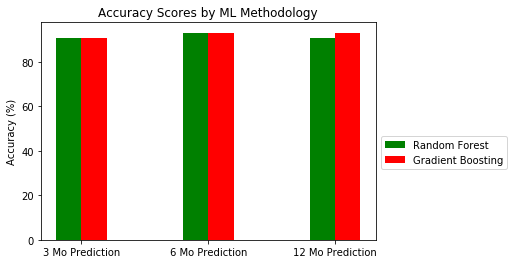

In [58]:
 #Make barcharts to compare accuracies across various models

#Make lists of accuracy scores based on order stated in results

y_random_forest = [90.7, 93.0, 90.5]
y_gradient_boosting = [90.7, 93.0, 92.9]

ax = plt.subplot()

N=3
ind = np.arange(N)

p1 = ax.bar(ind, y_random_forest,width=0.2,color='green',align='center')
p2 = ax.bar(ind+0.2, y_gradient_boosting,width=0.2,color='red',align='center')



ax.set_title('Accuracy Scores by ML Methodology')
ax.set_xticks(ind + 0.2 / 2)
ax.set_xticklabels(['3 Mo Prediction', '6 Mo Prediction', '12 Mo Prediction'])
plt.ylabel('Accuracy (%)')
ax.legend((p1[0], p2[0]), ('Random Forest', 'Gradient Boosting'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

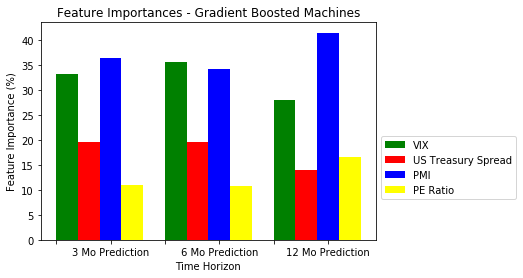

In [76]:
#Make barcharts to compare feature importances (Gradient Boosting)

FI_VIX = [33.2, 35.5, 28.0]
FI_Spread = [19.5, 19.5, 14.0]
FI_PMI = [36.3, 34.2, 41.4]
FI_PE = [11.0, 10.7, 16.6]


ax = plt.subplot()

N = 3
ind = np.arange(N) 

p1 = ax.bar(ind, FI_VIX,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Spread,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_PMI,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_PE,width=0.2,color='yellow',align='edge')



ax.set_title('Feature Importances - Gradient Boosted Machines')
ax.set_xticklabels([' ', ' ','3 Mo Prediction', ' ', '6 Mo Prediction', ' ', '12 Mo Prediction'])
plt.xlabel('Time Horizon')
plt.ylabel('Feature Importance (%)')
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('VIX', 'US Treasury Spread', 'PMI', 'PE Ratio'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

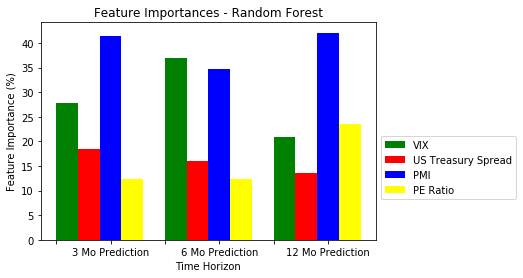

In [78]:
#Make barcharts to compare feature importances (Random Forest)


FI_VIX = [27.8, 36.9, 20.9]
FI_Spread = [18.4, 16.0, 13.5]
FI_PMI = [41.4, 34.7, 42.1]
FI_PE = [12.4, 12.4, 23.5]


ax = plt.subplot()

N = 3
ind = np.arange(N) 

p1 = ax.bar(ind, FI_VIX,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Spread,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_PMI,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_PE,width=0.2,color='yellow',align='edge')



ax.set_title('Feature Importances - Random Forest')
ax.set_xticklabels([' ', ' ','3 Mo Prediction', ' ', '6 Mo Prediction', ' ', '12 Mo Prediction'])
plt.xlabel('Time Horizon')
plt.ylabel('Feature Importance (%)')
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('VIX', 'US Treasury Spread', 'PMI', 'PE Ratio'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

In [80]:
#Predict Whether A Recession is imminent with new methods

def gbc4(data, current_values):
    X, Xtest, y, ytest = train_test_split(data[['VIX','spread', 'PMI', 'PE']], data.USREC.values, random_state=5, test_size = 0.2)
    clf = GradientBoostingClassifier()
    clf.fit(X, y)
    prediction = clf.predict(current_values)
    print('Recession Prediction (1 for yes, 0 for no): ' + str(prediction))
    
    
def rfc4(data, current_values):
    X, Xtest, y, ytest = train_test_split(data[['VIX','spread', 'PMI', 'PE']], data.USREC.values, random_state=5, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X, y)
    prediction = clf.predict(current_values)
    print('Recession Prediction (1 for yes, 0 for no): ' + str(prediction))

In [88]:
#Predict whether a recession will occur 3, 6, and 12 months out with today's data

#VIX = 13.42
#US Treasury Spread = 1.19
#PMI = 56.5
#PE = 24.69

current = [[13.42, 1.19, 56.5, 24.69]]

gbc4(all_3, current)
gbc4(all_6, current)
gbc4(all_12, current)

rfc4(all_3, current)
rfc4(all_6, current)
rfc4(all_12, current)

Recession Prediction (1 for yes, 0 for no): [0.]
Recession Prediction (1 for yes, 0 for no): [0.]
Recession Prediction (1 for yes, 0 for no): [0.]
Recession Prediction (1 for yes, 0 for no): [0.]
Recession Prediction (1 for yes, 0 for no): [0.]
Recession Prediction (1 for yes, 0 for no): [0.]
